### <img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-395/477 Redes Neuronales Artificiales - 2019-2 </h1>

<H3 align='center'> Tarea 1  </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Manipulaciones en pandas y numpy, preprocesamientos
* Redes Densas Feed Forward
* Regularización y Dropout
* Vanishing Gradient y Skip Connections
* Learn Rate Decay
* Optimizadores
* Redes Convolucionales
* Image Data Agumentation


**Formalidades**  
* Equipos de trabajo de 2 personas (*Ambos estudiantes deben estar preparados para presentar la tarea el día de la entrega*)
* El entregable debe ser un _Jupyter Notebook_ incluyendo los códigos utilizados, los resultados, los gráficos realizados y comentarios. Debe seguir una estructura similar a un informe (se debe introducir los problemas a trabajar, presentar los resultados y discutirlos), se penalizará fuertemente ausencia de comentarios, explicaciones de gráficos, _etc_. Si lo prefiere puede entregar un _Jupyter Notebook_ por pregunta o uno por toda la tarea, con tal de que todos los entregables esten bien identificados y se encuentren en el mismo repositorio de _Github_.
* Se debe preparar una presentación del trabajo realizado y sus hallazgos. El presentador será elegido aleatoriamente y deberá apoyarse en el _Jupyter Notebook_ que entregarán. 
* Formato de entrega: envı́o de link del repositorio en _Github_, al correo electrónico del ayudante (<alvaro.valderrama.13@sansano.usm.cl>), en copia al profesor (<cvalle@inf.utfsm.cl>).   Especificar el siguiente asunto: [INF-395/477-2019 Tarea 1]. Invitar como colaborador al usuario de github "avalderr" para poder acceder al repositorio en caso de ser privado.
* Fecha de entrega y presentaciones: 22 de Noviembre. Hora límite de entrega: 23:59. Cualquier _commit_ luego de la hora límite no será evaluado. Se realizará descuento por atrasos en envío del mail igualmente.  

<hr style="height:2px;border:none"/>

La tarea se divide en tres partes:

* 1 - Redes Feed Forward para Airbnb
* 2 - Reconocimiento de Imagenes en CIFAR10    
* 3 - Reconocimiento de frutas y verduras

La tarea tiene ejemplos de códigos con los cuales pueden guiarse en gran parte, sin embargo, solo son guias y pueden ser creativos al momento de resolver la tarea. Soluciones creativas o elegantes serán valoradas. También en algunas ocaciones se hacen elecciones arbitrarias, ustedes pueden realizar otras elecciones con tal de que haya una pequeña justificación de por qué su elección es mejor o equivalente.
Recuerden intercalar su código con *comentarios* en celdas _Markdown_, con los comentarios de la pregunta y con cualquier analisis, fórmula (en $ \LaTeX $) o explicación que les parezca relevante para justificar sus procedimientos. *No respondan las preguntas en comentarios en el código*.
Noten que en general cuando se les pide elegir algo o proponer algo no se evaluará tanto la elección en si. En cambio la argumentación detrás de la elección será lo más ponderado.
Si algun modelo se demora demasiado en correr en su maquina, no olvide que puede correr _Jupyter Notebooks_ en _Collab_ de Google, incluso con la opción de aceleración con GPU (particularmente útil para los modelos más grandes), esto puede ser relevante para las maquinas más lentas al momento de realizar exploraciones con _K-folds_ o las redes más grandes. Existe también la posibilidad de utilizar _Google Cloud Plataform_, donde tienen 300 dolares de prueba por un año y pueden comprar tiempo de procesamiento en maquinas aceleradas con GPU; maquinas ya configuradas para _deep leraning_ pueden encontrarse en el _Marketplace_.

_________________________

# 1 - Redes Feed Forward para Airbnb

De las redes neuronales artificiales más simples se encuentran las redes densas o _Feed Forward_, donde todas las neuronas de una capa estan conectadas a todos los inputs y envian su señal de activación a todas las neuronas de la siguiente capa. Estas redes, si bien son las más simples, suelen tener desempeños bastante buenos, y en muchas aplicaciones reales son utilizadas, ya sea por si solas o en combinación con otros modelos. Además, son las redes donde más facil se pueden observar muchos de los fenómenos que se han descubierto a lo largo de los años de desarrollo de esta area del conocimiento, tanto por ser de las redes vigentes más antiguas y por su estructura relativamente simple. En esta primera parte de la tarea exploraremos las redes densas y algunos de sus hiperparámetros más relevantes como la profundidad, el número de unidades; estudiaremos también algunos métodos de regularización y evidenciaremos el problema del _vanishing gradient_ y el _exploding gradient_, viendo también algunos optimizadores existentes. 

Para realizar esto, utilizaremos una base de datos de precios de inmuebles anunciados en Airbnb, la cual se encuentra disponible en _Kaggle_, en la siguiente URL: https://www.kaggle.com/stevezhenghp/airbnb-price-prediction. El dataset cuenta de casi mil registros, donde podemos encontrar el logaritmo del precio del anuncio, el tipo de propiedad, las amenidades disponibles, el número de personas que puede alojar, el número de baños, entre otros. 
Nuesta tarea durante esta pregunta será predecir el valor del logaritmo del precio del anuncio a partir de algunas de las otras variables presentes en el dataset. Para esto primero deberán preprocesar los datos para transformarlos a una forma que pueda ser utilizada por una red neuronal o eliminarlos en el caso que se estime conveniente. Una vez separados los datos de entrenamiento, validación y test, procederemos a entrenar diferentes modelos, comparandolos y evaluando sus desempeños. 

### 1.a Carga de datos y primeros analisis
Cargue los datos en un _dataframe_ como muestra el código. Explore superficialmente los datos utilizando los metodos `.head`, `.describe` o `.info` del _DataFrame_.

In [1]:
import pandas as pd

#df_full = pd.read_csv(io.BytesIO(uploaded['train.csv']))
df_full = pd.read_csv("train.csv")

df_full.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


Separaremos las columnas en distintas categorías pues deberan ser tratadas de maneras distintas. Las columnas "others" y "categorical" ya están separadas, complete las numéricas y las fechas.

¿Qué particularidad tiene las columnas agrupadas en "otros" y porque esto nos complicará su utilización?

In [2]:
other_col = df_full.columns[[4, 11, 25, 21]]
cat_col = df_full.columns[[0, 2, 3, 7, 8, 9, 10, 13, 14, 17, 22, 26]]
num_col = df_full.columns[[1, 5, 6, 15, 19, 20, 23, 24, 27, 28]]
date_col = df_full.columns[[12, 16, 18]]

for col in df_full[other_col].columns:
    print(col)

amenities
description
thumbnail_url
name


Explore más en detalle la columna `amenities` y explique por qué sería interesante rescatar la información contenida en ella tomando en cuenta el problema en cuestión.

In [3]:
df_full['amenities'].head(5)

0    {"Wireless Internet","Air conditioning",Kitche...
1    {"Wireless Internet","Air conditioning",Kitche...
2    {TV,"Cable TV","Wireless Internet","Air condit...
3    {TV,"Cable TV",Internet,"Wireless Internet",Ki...
4    {TV,Internet,"Wireless Internet","Air conditio...
Name: amenities, dtype: object

Son variables categoricas que estan representadas como texto. Tiene sentido incluirlas porque entre más comodidades tenga un departamento, es lógico pensar que su valor debería ser mayor.

### 1.b Amenities como categórica
En esta pregunta extraeremos cada una de las `amenities` posibles y la representaremos como una columna categorica, es decir una columna con un 1 si la esa característica aparece como disponible en el anuncio y un 0 en caso contrario. 
Para esto primero extraiga un conjunto de todas las amenities posibles. Puede utilizar el método `.apply` de las `Series` de pandas para transformar las entradas de la columna a una lista de las _amenities_ como muestra el código. Luego puede usar un `set` para evitar repeticiones inecesarias.

In [4]:
import numpy as np

amenities_as_lists = df_full['amenities'].apply(lambda x: np.array(x.replace("{",'').replace("}",'').replace("\"",'').split(',')))

amenities_set = set(np.hstack(amenities_as_lists.values))
print(amenities_set)

print("Hay un total de", len(amenities_set) - 1, "amenities posibles")

{'', 'Elevator', 'Hot water kettle', 'High chair', 'Dishwasher', 'Keypad', 'Disabled parking spot', 'Internet', 'Gym', 'First aid kit', 'Luggage dropoff allowed', 'Private living room', 'Other', 'Pets allowed', 'Toilet paper', 'Breakfast', 'Kitchen', 'Bathtub with shower chair', 'Accessible-height toilet', 'Lake access', 'Iron', 'Window guards', 'Beach essentials', 'Pack ’n Play/travel crib', 'Private bathroom', 'Hangers', 'Accessible-height bed', 'Buzzer/wireless intercom', 'Smoking allowed', 'Self Check-In', 'Shampoo', 'Flat smooth pathway to front door', 'Lock on bedroom door', 'Air conditioning', 'Indoor fireplace', 'Roll-in shower with chair', 'Children’s dinnerware', 'Hot tub', 'Cable TV', 'Fire extinguisher', 'Lockbox', 'Suitable for events', 'Microwave', 'Ethernet connection', 'translation missing: en.hosting_amenity_50', 'Doorman Entry', 'Private entrance', 'Wide entryway', 'Heating', 'Wheelchair accessible', 'Wide hallway clearance', 'Free parking on premises', ' smooth pathw

Cuente la cantidad de apariciones de cada _amenity_ en el _dataset_. 

Claramente algunos valores tienen muy pocos ejemplos, lo cual tiene sentido considerando el problema. Optaremos por no considerar las amenities que aparezcan en menos de 1000 anuncios. 

Cree ahora nuevas columnas en el _DataFrame_, donde cada columna corresponda a una _amenity_ que cumpla el criterio y se represente binariamente, como muestra el esqueleto de código.

Aprovecharemos de eliminar las otras columas `others` pues para el alcance de esta tarea no vale la pena considerarlas.

In [5]:
amenities_splitted = pd.Series(np.hstack(amenities_as_lists.values))
print(amenities_splitted.value_counts())

allowed_amenities = [j for j, i in amenities_splitted.value_counts().iteritems() if i > 1000]

for amenity in amenities_set:
    if amenity in allowed_amenities:
        df_full['Has_'+amenity] = df_full['amenities'].apply(lambda x: 1 if amenity in x else 0)

df = df_full.drop(columns=other_col)
df.head(5)

Wireless Internet                      71265
Kitchen                                67526
Heating                                67073
Essentials                             64005
Smoke detector                         61727
                                       ...  
Hand soap                                  1
Bath towel                                 1
Wide clearance to shower and toilet        1
Body soap                                  1
Hand or paper towel                        1
Length: 131, dtype: int64


,id,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,Has_Hair dryer,Has_Bathtub,Has_Dog(s),Has_Laptop friendly workspace,Has_TV,Has_Hot water,Has_Washer,Has_Cat(s),Has_Bed linens,Has_Wide doorway
0,6901257,5.010635,Apartment,Entire home/apt,3,1.0,Real Bed,strict,True,NYC,...,1,0,0,0,0,0,0,0,0,0
1,6304928,5.129899,Apartment,Entire home/apt,7,1.0,Real Bed,strict,True,NYC,...,1,0,0,0,0,0,1,0,0,0
2,7919400,4.976734,Apartment,Entire home/apt,5,1.0,Real Bed,moderate,True,NYC,...,1,0,0,1,1,0,0,0,0,0
3,13418779,6.620073,House,Entire home/apt,4,1.0,Real Bed,flexible,True,SF,...,0,0,0,0,1,0,1,0,0,0
4,3808709,4.744932,Apartment,Entire home/apt,2,1.0,Real Bed,moderate,True,DC,...,0,0,0,0,1,0,0,0,0,0


### 1.c Otras variables categoricas
Para cada una de las variables categoricas, cuente cuantos valores únicos tiene en el dataset. ¿Cuales la llaman la atención y por qué? ¿Tiene esto sentido con la naturaleza del problema?

Eliminaremos las variables `id` pues solo sirve para identificar cada anuncio y la variable `zipcode` pues representa una información similar a la de `neighbourhood` y en la realidad los usuarios se interesan más por la segunda que por la primera. 

Cuente cuantos valores tiene cada clase de algunas variables categóricas que le interesen, usando el metodo `.value_counts` de las `Series`.

Contaremos también los valores NA (valores ausentes o corrompidos) en todo el dataset con el código dentro del `print`. Eliminaremos todos aquellas variables que tengan más de un 10% de valores ausentes, es decir las 4 columnas presentes en el código. Para evitar problemas más adelante, complete el resto de los valores ausentes con el valor 0, usando el metodo `.fillna`

In [6]:
# . . .
cat_col = cat_col.drop(['id', 'zipcode'])
df = df.drop(['id', 'zipcode'], axis=1)
for i in cat_col:
    print(df[i].value_counts())

print(df.isna().sum().sort_values(ascending=False))

df = df.drop(columns=['host_response_rate', 'review_scores_rating', 'first_review', 'last_review'])

df = df.fillna(value=0)
# . . .

Apartment             49003
House                 16511
Condominium            2658
Townhouse              1692
Loft                   1244
Other                   607
Guesthouse              498
Bed & Breakfast         462
Bungalow                366
Villa                   179
Dorm                    142
Guest suite             123
Camper/RV                94
Timeshare                77
Cabin                    72
In-law                   71
Hostel                   70
Boutique hotel           69
Boat                     65
Serviced apartment       21
Tent                     18
Castle                   13
Vacation home            11
Yurt                      9
Hut                       8
Treehouse                 7
Chalet                    6
Earth House               4
Tipi                      3
Cave                      2
Train                     2
Island                    1
Lighthouse                1
Casa particular           1
Parking Space             1
Name: property_type,

Ahora transformaremos todas las variables categoricas restantes a una representación en _one hot vector_. Para esto odemos utilizar la función `to_categorical` propuesta por keras. Puede apoyarse de las lineas de código abajo. No olvide eliminar las columnas originales del _dataframe_.

Por último, en este caso optaremos por eliminar las columnas correspondientes a alguna fecha, pues no resultan significativas para el problema y la cantidad de variables disponibles son suficientes para hacer una exploración de las redes densas. 

In [7]:
from tensorflow.keras.utils import to_categorical

for col in cat_col:
    onehot = to_categorical(df[col].astype('category').cat.codes)
    df[[col + '_' + str(i) for i in range(onehot.shape[1])]] = pd.DataFrame(onehot)

df = df.drop(['host_since'], axis=1)
df.head(5)

/home/marimo/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/marimo/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/marimo/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/marimo/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dty

,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,...,neighbourhood_610,neighbourhood_611,neighbourhood_612,neighbourhood_613,neighbourhood_614,neighbourhood_615,neighbourhood_616,neighbourhood_617,neighbourhood_618,neighbourhood_619
0,5.010635,Apartment,Entire home/apt,3,1.0,Real Bed,strict,True,NYC,t,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.129899,Apartment,Entire home/apt,7,1.0,Real Bed,strict,True,NYC,t,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.976734,Apartment,Entire home/apt,5,1.0,Real Bed,moderate,True,NYC,t,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.620073,House,Entire home/apt,4,1.0,Real Bed,flexible,True,SF,t,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.744932,Apartment,Entire home/apt,2,1.0,Real Bed,moderate,True,DC,t,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 1.d Estandarización y Train Test Split
En esta pregunta nos ocuparemos de separar el _dataset_ en los conjuntos de entrenamiento, validación y test y estandarizar los datos. Para esto puede utilizar la librería sklearn, en particular las funciones `StandarScaler` y `train_test_split`.

Para esto separe primero el dataset en $X$ e $Y$. Luego separe los datos considerando un $70\%$ de ellos para entrenamiento, un $20\%$ para validación y un $10\%$ para test. Finalmente ajuste los _scalers_ con los datos de entrenamiento y transforme los datos. 

- ¿Qué operación matemática realiza `StandarScaler` al momento de tranformar los datos? 
- ¿Por qué debemos transformar los datos de validación y de test con el _scaler_ ajustado a los datos de entrenamiento? 
- ¿Qué estamos tratando de representar en esta separación en conjuntos de entrenamiento, validación y test?

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['log_price'])
X = X.drop(columns=cat_col)
print(X.columns)

y = df['log_price']

X_train, X_aux, y_train, y_aux = train_test_split(X, y, test_size=0.30) 
X_val, X_test, y_val, y_test = train_test_split(X_aux, y_aux, test_size=0.66) 

scaler_x = StandardScaler()
scaler_x.fit(X_train)
x_train = scaler_x.transform(X_train)
x_test = scaler_x.transform(X_test)
x_val = scaler_x.transform(X_val)

Index(['accommodates', 'bathrooms', 'latitude', 'longitude',
       'number_of_reviews', 'bedrooms', 'beds', 'Has_Elevator',
       'Has_Dishwasher', 'Has_Keypad',
       ...
       'neighbourhood_610', 'neighbourhood_611', 'neighbourhood_612',
       'neighbourhood_613', 'neighbourhood_614', 'neighbourhood_615',
       'neighbourhood_616', 'neighbourhood_617', 'neighbourhood_618',
       'neighbourhood_619'],
      dtype='object', length=760)


### 1.e Primera Red
En esta pregunta construiremos y entrenaremos una primera red neuronal. Para esto utilizaremos la librería keras que se ocupa de crear, compilar y entrenar los modelos de manera simple. Esta libreria puede conectarse a distintos _backend_ que proveen el _framework_ para realizar efectivamente las operaciones necesarias por la red. Los más usuales son _TensorFlow_ y _Theano_, sin embargo en el último tiempo _TensorFlow_ ha tenido una gran adopción por diversos motivos, por lo cual la recomendación es instalar y utilizar TensorFlow. Keras se encargará por lo tanto de crear los modelos y al momento de compilarlos se instanciaran estos en una sesión de TensorFlow. 

Esta primera red será una red de una capa oculta con $256$ neuronas, activación ReLu. Para esta red y todas las demas utilizaremos la función de pérdida _Mean Square Error_ para obtener resultados comparables entre distintos modelos. Para entrenar esta red utilizaremos Gradiente Descendente Estocástico con un _Learn Rate_ de 0.002. Finalmente entrenaremos esta red por unas 20 _epochs_. 

Construya la red basandose en el código y la documentación de keras. 

In [9]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

inputs = Input(shape=(x_train.shape[1],))
hidden1 = Dense(256, activation='relu')(inputs)
outputs = Dense(1)(hidden1)
model = Model(inputs=inputs, outputs=outputs)

model.compile(optimizer=SGD(lr=0.002), loss='mse')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


Una forma fácil de instanciar la red es la propuesta en el codigo abajo, es decir entrenar la red por 0 _epochs_. Una red instanciada nos permite utilizar el método `.summary` para ver su número de parametros y los tamaños de cada capa. 

Explique el número de parámetros presentes en esta red, es decir: ¿Cómo a partir de la dimensión del _Input_ y el número de neuronas obtenemos ese número de parámetros?

In [10]:
model.fit(x_train, y_train, epochs=0)
model.summary()

Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 760)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               194816    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 195,073
Trainable params: 195,073
Non-trainable params: 0
_________________________________________________________________


Entrene la red por 20 _epochs_, guardando el `history` que retorna el metodo `.fit`.

Grafique como varian los errores de validación y de entrenamiento a lo largo de las _epochs_. Comente.

Train on 51877 samples, validate on 7559 samples
Epoch 1/20
51877/51877 [==============================] - 5s 90us/sample - loss: 2.2710 - val_loss: 1.1267
Epoch 2/20
51877/51877 [==============================] - 3s 58us/sample - loss: 0.5392 - val_loss: 0.4834
Epoch 3/20
51877/51877 [==============================] - 3s 60us/sample - loss: 0.3467 - val_loss: 0.2992
Epoch 4/20
51877/51877 [==============================] - 2s 44us/sample - loss: 0.2468 - val_loss: 0.2509
Epoch 5/20
51877/51877 [==============================] - 2s 43us/sample - loss: 0.2117 - val_loss: 0.2383
Epoch 6/20
51877/51877 [==============================] - 2s 43us/sample - loss: 0.1929 - val_loss: 0.2362
Epoch 7/20
51877/51877 [==============================] - 2s 43us/sample - loss: 0.1866 - val_loss: 0.1990
Epoch 8/20
51877/51877 [==============================] - 2s 43us/sample - loss: 0.1810 - val_loss: 0.1931
Epoch 9/20
51877/51877 [==============================] - 2s 42us/sample - loss: 0.1795 - val_l

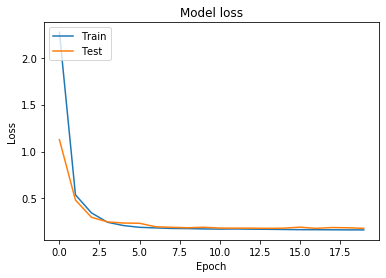

In [11]:
history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    validation_data=(x_val,y_val))

import matplotlib.pyplot as plt

plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

Cree y entrene nuevamente la red, esta vez cambiando el _learn rate_ utilizado para el SGD. Pruebe a lo menos dos valores mayores y dos valores menores al elegido anteriormente. Note que para valores mayores al propuesto puede comenzar a observar fenómeno de divergencia, por lo cual es recomendable agregarle a la red un _calback_, es decir una función que verifica estados y comportamientos de la red mientras se entrena, en particular `TerminateOnNaN`, el cual interrumpirá el proceso de entrenamiento si encuentra un valor NaN. 

Grafique el comportamiento de los errores de validación y entrenamiento para a lo menos un valor mayor y uno menor al original y comente.

Entrenando modelo con learning rate: 0.1
Train on 51877 samples, validate on 7559 samples
Epoch 1/20
   32/51877 [..............................] - ETA: 3:40 - loss: 23.1134Batch 4: Invalid loss, terminating training
Modelo detenido
Entrenando modelo con learning rate: 0.01
Train on 51877 samples, validate on 7559 samples
Epoch 1/20


/home/marimo/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/utils/generic_utils.py:370: RuntimeWarning: invalid value encountered in multiply
  self._values[k][0] += v * (current - self._seen_so_far)
/home/marimo/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/utils/generic_utils.py:370: RuntimeWarning: invalid value encountered in double_scalars
  self._values[k][0] += v * (current - self._seen_so_far)


 3744/51877 [=>............................] - ETA: 5s - loss: 18.3403Batch 129: Invalid loss, terminating training
Modelo detenido
Entrenando modelo con learning rate: 0.001
Train on 51877 samples, validate on 7559 samples
Epoch 1/20
51877/51877 [==============================] - 3s 57us/sample - loss: 2.3644 - val_loss: 5.9227
Epoch 2/20
51877/51877 [==============================] - 2s 43us/sample - loss: 1.0678 - val_loss: 0.6107
Epoch 3/20
51877/51877 [==============================] - 2s 43us/sample - loss: 0.3600 - val_loss: 0.2338
Epoch 4/20
51877/51877 [==============================] - 2s 47us/sample - loss: 0.2270 - val_loss: 0.2108
Epoch 5/20
51877/51877 [==============================] - 4s 68us/sample - loss: 0.2064 - val_loss: 0.2040
Epoch 6/20
51877/51877 [==============================] - 3s 49us/sample - loss: 0.1986 - val_loss: 0.1991
Epoch 7/20
51877/51877 [==============================] - 2s 48us/sample - loss: 0.1936 - val_loss: 0.1964
Epoch 8/20
51877/51877 [===

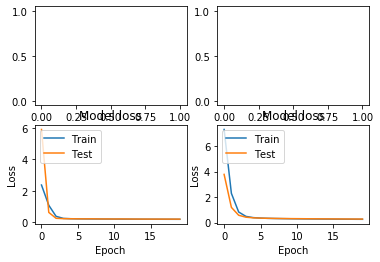

In [12]:
from tensorflow.keras.callbacks import TerminateOnNaN

lrs = [0.1, 0.01, 0.001, 0.0001]
terminate = TerminateOnNaN()

for n, lr in enumerate(lrs):
  print('Entrenando modelo con learning rate:', lr)
  inputs = Input(shape=(x_train.shape[1],))
  hidden1 = Dense(256, activation='relu')(inputs)
  outputs = Dense(1)(hidden1)
  model = Model(inputs=inputs, outputs=outputs)
  model.compile(optimizer=SGD(lr=lr), loss='mse')
  
  history = model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), callbacks=[terminate])

  try:
    plt.subplot(2, 2, n+1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
  except KeyError:
    print('Modelo detenido')
  
plt.show()



### 1.f Activación y regularizadores $l$1 $l$2
En esta pregunta se les propone explorar distintas funciones de activación o de regularización usual. Por lo extenso de la tarea se les propone elegir una de las dos exploraciones. En ambos casos deben entrenar la misma red entrenada anteriormente utilizando gradiente descendente con algun _learn rate_ que les parezca adecuado luego de la exploración en la pregunta anterior. 

* En caso de elegir explorar distintas funciones de activación, cambie la activación de la capa oculta sucesivamente por: tangente hiperbólica, _Leaky ReLu_, _softmax_, sigmoidea y lineal. Para esto puede basarse en el código presentado abajo y la documentación de keras. Para la activación _Leaky ReLu_ pruebe cambiar el parámetro de la red. Describa sus resultados y si observa diferencias entre las redes. 

* En caso de elegir explorar las funciones de regularización usual, agregue regularización $l$1 o $l$2 a la capa oculta y pruebe cambiar la tasa de regularización, reportando sus resultados. ¿Qué ocurre si la regularización es muy alta o muy baja? Una vez satisfecho con una tasa de regularización, aplique la regularización a la capa de salida y luego a ambas capas. 

**Independiente de la opción elegida**, comente sobre los siguientes temas:

¿Cual es el interez de tener activaciones no lineales? ¿Le parece buena opción la activación sigmoidea para la capa oculta? ¿Qué pasaría si usaramos esta activación en la capa de salida? 

¿Cual es la intención de la regularización en general? En particular, ¿Que restricción implicita imponen las regularizaciones $l$1 o $l$2 sobre los pesos de la capa en la cual se aplican? Apoyese de ecuaciones. 

Train on 51877 samples, validate on 7559 samples
Epoch 1/20
51877/51877 [==============================] - 3s 57us/sample - loss: 2.0812 - val_loss: 0.2807
Epoch 2/20
51877/51877 [==============================] - 3s 60us/sample - loss: 0.2478 - val_loss: 0.2491
Epoch 3/20
51877/51877 [==============================] - 2s 47us/sample - loss: 0.2258 - val_loss: 0.2387
Epoch 4/20
51877/51877 [==============================] - 2s 46us/sample - loss: 0.2152 - val_loss: 0.2316
Epoch 5/20
51877/51877 [==============================] - 2s 45us/sample - loss: 0.2080 - val_loss: 0.2284
Epoch 6/20
51877/51877 [==============================] - 3s 50us/sample - loss: 0.2023 - val_loss: 0.2257
Epoch 7/20
51877/51877 [==============================] - 2s 47us/sample - loss: 0.1970 - val_loss: 0.2229
Epoch 8/20
51877/51877 [==============================] - 2s 44us/sample - loss: 0.1929 - val_loss: 0.2199
Epoch 9/20
51877/51877 [==============================] - 2s 46us/sample - loss: 0.1889 - val_l

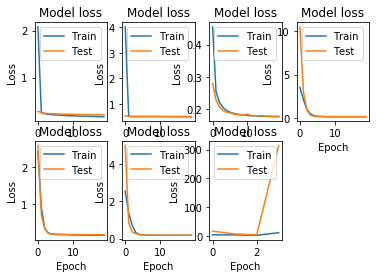

In [13]:
from tensorflow.keras.layers import Activation, LeakyReLU

activations = [Activation(i) for i in ['tanh', 'softmax', 'sigmoid', None]]
activations += [LeakyReLU(i) for i in [0.1, 0.5, 0.9]]

for n, activation in enumerate(activations):
  inputs = Input(shape=(x_train.shape[1],))
  hidden1 = Dense(256)(inputs)
  activ1 = activation(hidden1)
  outputs = Dense(1)(activ1)
  model = Model(inputs=inputs, outputs=outputs)
  model.compile(optimizer=SGD(lr=0.001), loss='mse')

  history = model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), callbacks=[terminate])

  plt.subplot(2, 4, n+1)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

### 1.g Exploración del Número de neuronas

Ahora probaremos cambiando el número de neuronas en la capa oculta. Para esto, entrenen la red que estimen conveniente luego de la pregunta anterior, variando el numero de nuronas. Deben explorar a lo menos 10 número de neuronas distintos. Una recomendación sería por ejemplo explorar numero de neuronas en potencias de 2. 

Para cada red entrenada, recuperen el mejor error de validación y el error de entrenamiento en la _epoch_ donde se obtuvo tal error de validación. Grafique como se comportan ambos errores a medida crece el número de neuronas y comente. 

Entrenando con 1  neuronas.
Train on 51877 samples, validate on 7559 samples
Epoch 1/20
51877/51877 [==============================] - 3s 60us/sample - loss: 3.4382 - val_loss: 3.0496
Epoch 2/20
51877/51877 [==============================] - 3s 56us/sample - loss: 0.9258 - val_loss: 0.5128
Epoch 3/20
51877/51877 [==============================] - 2s 46us/sample - loss: 0.3462 - val_loss: 0.3432
Epoch 4/20
51877/51877 [==============================] - 2s 46us/sample - loss: 0.2735 - val_loss: 0.2950
Epoch 5/20
51877/51877 [==============================] - 2s 46us/sample - loss: 0.2426 - val_loss: 0.2627
Epoch 6/20
51877/51877 [==============================] - 3s 55us/sample - loss: 0.2257 - val_loss: 0.2364
Epoch 7/20
51877/51877 [==============================] - 3s 58us/sample - loss: 0.2126 - val_loss: 0.2228
Epoch 8/20
51877/51877 [==============================] - 3s 49us/sample - loss: 0.2039 - val_loss: 0.2109
Epoch 9/20
51877/51877 [==============================] - 3s 61us/s

51877/51877 [==============================] - 3s 56us/sample - loss: 0.1787 - val_loss: 0.1797
Epoch 8/20
51877/51877 [==============================] - 3s 58us/sample - loss: 0.1779 - val_loss: 0.1803
Epoch 9/20
51877/51877 [==============================] - 3s 59us/sample - loss: 0.1772 - val_loss: 0.1806
Epoch 10/20
51877/51877 [==============================] - 3s 56us/sample - loss: 0.1769 - val_loss: 0.1789
Epoch 11/20
51877/51877 [==============================] - 3s 58us/sample - loss: 0.1763 - val_loss: 0.1796
Epoch 12/20
51877/51877 [==============================] - 3s 53us/sample - loss: 0.1759 - val_loss: 0.1792
Epoch 13/20
51877/51877 [==============================] - 3s 48us/sample - loss: 0.1755 - val_loss: 0.1786
Epoch 14/20
51877/51877 [==============================] - 2s 48us/sample - loss: 0.1752 - val_loss: 0.1785
Epoch 15/20
51877/51877 [==============================] - 2s 48us/sample - loss: 0.1747 - val_loss: 0.1783
Epoch 16/20
51877/51877 [=================

51877/51877 [==============================] - 5s 95us/sample - loss: 4.1192 - val_loss: 29.8184
Epoch 2/20
51877/51877 [==============================] - 4s 74us/sample - loss: 9.4747 - val_loss: 18.3989
Epoch 3/20
51877/51877 [==============================] - 4s 77us/sample - loss: nan - val_loss: nan
Epoch 4/20
51877/51877 [==============================] - 4s 74us/sample - loss: nan - val_loss: nan
Epoch 5/20
51877/51877 [==============================] - 4s 83us/sample - loss: nan - val_loss: nan
Epoch 6/20
51877/51877 [==============================] - 4s 81us/sample - loss: nan - val_loss: nan
Epoch 7/20
51877/51877 [==============================] - 5s 93us/sample - loss: nan - val_loss: nan
Epoch 8/20
51877/51877 [==============================] - 5s 98us/sample - loss: nan - val_loss: nan
Epoch 9/20
51877/51877 [==============================] - 4s 81us/sample - loss: nan - val_loss: nan
Epoch 10/20
51877/51877 [==============================] - 5s 93us/sample - loss: nan - 

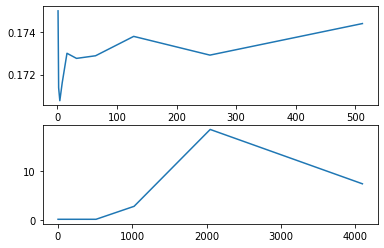

In [15]:
import numpy as np

train_error, val_error = [], []

for n_units in [2**i for i in range(13)]:
    print('Entrenando con', n_units, ' neuronas.')
    inputs = Input(shape=(x_train.shape[1],))
    hidden1 = Dense(n_units)(inputs)
    activ1 = LeakyReLU(0.5)(hidden1)
    outputs = Dense(1)(activ1)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=SGD(lr=0.001), loss='mse')

    history = model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), callbacks=[terminate])
    
    val_error.append(min(history.history['val_loss']))
    train_error.append(history.history['loss'][np.argmin(history.history['val_loss'])])

plt.subplot(2, 1, 1)
plt.plot([2**i for i in range(13)], train_error)
plt.subplot(2, 1, 2)
plt.plot([2**i for i in range(13)], val_error)
plt.show()

### 1.h Dropout
Como seguramente constataron en la pregunta anterior, un numero demasiado grande de parámetros en el modelo puede llevarnos a observar el fenomeno de _overfitting_. Una aproximación a este fenómeno que ha dado excelente resultado en redes neuronales es el método _dropout_, donde estocásticamente se desactivan una fracción de las neuronas al momento del entrenamiento, así efectivamente reduciendo el tamaño del modelo que se entrena en cada iteración e implicitamente obteniendo modelos más robustos por el simple hecho que al momento de entrenar nunca se entrena el "mismo" modelo. 

Según lo aprendido en el ramo, ¿en qué consiste el fenómeno de _overfitting_? ¿Por qué modelos más grandes suelen presentar el fenómeno? 

Entrene la mejor red obtenida en la pregunta anterior agregando una capa de _Dropout_ con parámetro $0.5$ inmediatamente luego de la capa oculta. Repita luego el proceso con una red con el doble de neuronas. Note que el agregar una capa _dropout_ hará que la red entrene más lento, por lo cual es recomendable aumentar el numero de _epochs_ para entrenar la red a completitud. 

¿Qué observa al agregar _dropout_? Comente y compare con sus resultados anteriores. 

In [16]:
from tensorflow.keras.layers import Dropout

print('Entrenando con 64 neuronas')
inputs = Input(shape=(x_train.shape[1],))
hidden1 = Dense(64)(inputs)
activ1 = LeakyReLU(0.5)(hidden1)
drop1 = Dropout(0.5)(activ1)
outputs = Dense(1)(drop1)
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=SGD(lr=0.001), loss='mse')

history = model.fit(x_train, y_train, epochs=120, validation_data=(x_val, y_val), callbacks=[terminate])

print('Entrenando con 128 neuronas')
inputs = Input(shape=(x_train.shape[1],))
hidden1 = Dense(128)(inputs)
activ1 = LeakyReLU(0.5)(hidden1)
drop1 = Dropout(0.5)(activ1)
outputs = Dense(1)(drop1)
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=SGD(lr=0.001), loss='mse')

history = model.fit(x_train, y_train, epochs=120, validation_data=(x_val, y_val), callbacks=[terminate])

Entrenando con 64 neuronas
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 51877 samples, validate on 7559 samples
Epoch 1/120
51877/51877 [==============================] - 4s 82us/sample - loss: 3.5543 - val_loss: 0.5324
Epoch 2/120
51877/51877 [==============================] - 3s 55us/sample - loss: 0.8839 - val_loss: 1.6173
Epoch 3/120
51877/51877 [==============================] - 3s 54us/sample - loss: 0.5638 - val_loss: 0.4117
Epoch 4/120
51877/51877 [==============================] - 3s 55us/sample - loss: 0.4275 - val_loss: 0.2216
Epoch 5/120
51877/51877 [==============================] - 3s 56us/sample - loss: 0.2959 - val_loss: 0.2261
Epoch 6/120
51877/51877 [==============================] - 3s 57us/sample - loss: 0.2859 - val_loss: 0.2158
Epoch 7/120
51877/51877 [==============================] - 3s 59us/sample - loss: 0.2699 - val_loss: 0.2055
Epoch 8/120
51877/51877 [============================

51877/51877 [==============================] - 3s 57us/sample - loss: 0.2117 - val_loss: 0.1790
Epoch 27/120
51877/51877 [==============================] - 3s 54us/sample - loss: 0.2117 - val_loss: 0.1802
Epoch 28/120
51877/51877 [==============================] - 3s 65us/sample - loss: 0.2103 - val_loss: 0.1813
Epoch 29/120
51877/51877 [==============================] - 3s 58us/sample - loss: 0.2107 - val_loss: 0.1847
Epoch 30/120
51877/51877 [==============================] - 3s 55us/sample - loss: 0.2123 - val_loss: 0.1811
Epoch 31/120
51877/51877 [==============================] - 3s 56us/sample - loss: 0.2106 - val_loss: 0.1828
Epoch 32/120
51877/51877 [==============================] - 3s 61us/sample - loss: 0.2090 - val_loss: 0.1803
Epoch 33/120
51877/51877 [==============================] - 3s 61us/sample - loss: 0.2150 - val_loss: 0.1825
Epoch 34/120
51877/51877 [==============================] - 4s 76us/sample - loss: 0.2083 - val_loss: 0.1782
Epoch 35/120
51877/51877 [======

### 1.i Extreme Learning Machine

Otra aproximación para obtener modelos grandes que no sobreajustan es la implementada por _ELM_. Explique en qué consiste la idea de _ELM_ y porqué esto podría evitar sobreajuste a pesar de utilizar modelos con gran número de parámetros. 

Entrene una _ELM_ de una capa fija y una capa oculta, la primera con un número relativamente grande y la segunda con un número relativamente pequeño. Puede utilizar los valores propuestos en el código u otros que le parezcan convenientes. 

Comente sobre el número total de parámetros y el número de parametros entrenables con respecto a los modelos anteriores. ¿Cómo se desempeña la red? ¿El número elevado de parámetros totales implica necesariamente _overfitting_?

In [19]:
inputs = Input(shape=(x_train.shape[1],))
hidden1 = Dense(5000, activation='relu', name='extreme')(inputs)
hidden2 = Dense(32, activation='relu')(hidden1)
outputs = Dense(1)(hidden2)
model = Model(inputs=inputs, outputs=outputs)
model.get_layer('extreme').trainable = False

model.compile(optimizer=SGD(lr=0.001), loss='mse')

history = model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), callbacks=[terminate])

Train on 51877 samples, validate on 7559 samples
Epoch 1/20
51877/51877 [==============================] - 4s 81us/sample - loss: 2.1622 - val_loss: 0.5913
Epoch 2/20
51877/51877 [==============================] - 3s 61us/sample - loss: 0.3232 - val_loss: 0.2610
Epoch 3/20
51877/51877 [==============================] - 3s 60us/sample - loss: 0.2199 - val_loss: 0.2216
Epoch 4/20
51877/51877 [==============================] - 3s 63us/sample - loss: 0.2030 - val_loss: 0.2019
Epoch 5/20
51877/51877 [==============================] - 3s 67us/sample - loss: 0.1965 - val_loss: 0.1991
Epoch 6/20
51877/51877 [==============================] - 3s 62us/sample - loss: 0.1920 - val_loss: 0.2216
Epoch 7/20
51877/51877 [==============================] - 4s 74us/sample - loss: 0.1881 - val_loss: 0.1993
Epoch 8/20
51877/51877 [==============================] - 3s 62us/sample - loss: 0.1853 - val_loss: 0.1926
Epoch 9/20
51877/51877 [==============================] - 4s 69us/sample - loss: 0.1826 - val_l

### 1.j Learning Rate Decay
Ahora entrenaremos un modelo manejando manualmente el _learn rate_. Para esto utilizaremos el _callback_ `LearningRateScheduler`. Este _callback_ nos permitirá implementar una función que maneje el _learn rate_ de nuestro modelo. 

Escriba una función que reciba la epoca actual y retorne un _learn rate_ lr. El lr inicial debe ser igual o mayor a alguno que haya dado buenos resultados en las preguntas anteriores. La función debe dividir por 2 el lr cada 10 _epochs_. Además ponga como restricción que el lr no debe ser menor a $5\times 10^{-5}$, es decir si el valor obtenido es menor a  $5\times 10^{-5}$, la función retorna  $5\times 10^{-5}$.

Entrene su red preferida de las preguntas anteriores con esta modificación, grafique los errores a lo largo del entrenamiento y comente. Según lo visto en el ramo, ¿por qué podría ser util disminuir el _learn rate_ a medida se avanza en el aprendizaje de la red?

In [29]:
from tensorflow.keras.callbacks import LearningRateScheduler

def step_decay(epoch):
    lr = 0.001 * 0.5**(epoch//10)
    if lr <= 5*10**-5:
        return 5*10**-5
    return lr

schedule = LearningRateScheduler(step_decay)

print('Entrenando con 128 neuronas')
inputs = Input(shape=(x_train.shape[1],))
hidden1 = Dense(128)(inputs)
activ1 = LeakyReLU(0.5)(hidden1)
drop1 = Dropout(0.5)(activ1)
outputs = Dense(1)(drop1)
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=SGD(lr=0.001), loss='mse')

history = model.fit(x_train, y_train, epochs=60, validation_data=(x_val, y_val), callbacks=[schedule, terminate])

0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.0005
0.00025
0.00025
0.00025
0.00025
0.00025
0.00025
0.00025
0.00025
0.00025
0.00025
0.000125
0.000125
0.000125
0.000125
0.000125
0.000125
0.000125
0.000125
0.000125
0.000125
6.25e-05
6.25e-05
6.25e-05
6.25e-05
6.25e-05
6.25e-05
6.25e-05
6.25e-05
6.25e-05
6.25e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
5e-05
Entrenando con 128 neuronas
Train on 51877 samples, validate on 7559 samples
Epoch 1/60
51877/51877 [==============================] - 4s 82us/sample - loss: 3.5983 - val_loss: 1.0618
Epoch 2/60
51877/51877 [==============================] - 3s 56us/sample - loss: 1.0131 - val_loss: 0.4456
Epoch 3/60
51

### 1.k Vanishing Gradient

El fenómeno del _vanishing gradient_ es el rápido decaimiento del paso de _Backpropagation_ al avanzar por las capas. A lo largo de la tarea solo hemos entrenado capas con una red oculta, de igual forma que la comunidad cientifica realizo por largo tiempo, por el problema del _vanishing gradient_ y por el teorema de aproximación universal que resumidamente demuestra que una red de una sola capa puede aproximar una amplia familia de funciones. 

En esta pregunta entrenaremos una red neuronal profunda sin implementar ninguno de los dispositivos que permiten hoy en día sortear el problema del _vanishing gradient_, para ponerlo en evidencia. Para esto construya una red con 6 capas ocultas, con la siguiente lista de numero de neuronas: $256$ $256$ $128$ $128$ $32$ y $32$, o con valores similares. De tal manera obtendrá un valor de parámetros relativamente comparable a los valores utilizados en las primeras redes. 

Grafique un histograma con los pesos de las 6 capas densas de la red sin entrenar, entrenela a completitud con el método que estime conveniente y luego grafique nuevamente los histogramas para las 6 capas. Comente lo que observa. 

Luego, pruebe cambiar la inizialización de los pesos de la capa densa, puede revisar la documentación de keras para ver las opciones existentes a parte de `glorot_uniform` por defecto. ¿Se logra solucionar el problema? 

Por último, pruebe aumentar la tasa de aprendizaje para ver si logra hacer que el paso de _backpropagation_ alcance las capas que anteriormente no se entrenaban. ¿Qué observa en este caso? 

In [57]:
# Red de 6 capas
inputs = Input(shape=(x_train.shape[1],))
hidden1 = Dense(256, activation='relu', name='hidden1')(inputs)
hidden2 = Dense(256, activation='relu', name='hidden2')(hidden1)
hidden3 = Dense(128, activation='relu', name='hidden3')(hidden2)
hidden4 = Dense(128, activation='relu', name='hidden4')(hidden3)
hidden5 = Dense(32, activation='relu', name='hidden5')(hidden4)
hidden6 = Dense(32, activation='relu', name='hidden6')(hidden5)
outputs = Dense(1)(hidden6)
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=SGD(lr=0.001), loss='mse')


weights1 = []
for name in ['hidden'+str(i) for i in range(1,7)]:
    weights1.append(model.get_layer(name).get_weights()[0].flatten())
    weights1.append(model.get_layer(name).get_weights()[1])
    
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), callbacks=[terminate])

weights2 = []
for name in ['hidden'+str(i) for i in range(1,7)]:
    weights2.append(model.get_layer(name).get_weights()[0].flatten())
    weights2.append(model.get_layer(name).get_weights()[1])

Train on 51877 samples, validate on 7559 samples
Epoch 1/10
51877/51877 [==============================] - 8s 153us/sample - loss: 1.0809 - val_loss: 0.2567
Epoch 2/10
51877/51877 [==============================] - 4s 83us/sample - loss: 0.2245 - val_loss: 0.2221
Epoch 3/10
51877/51877 [==============================] - 5s 92us/sample - loss: 0.2014 - val_loss: 0.2141
Epoch 4/10
51877/51877 [==============================] - 5s 89us/sample - loss: 0.1901 - val_loss: 0.2054
Epoch 5/10
51877/51877 [==============================] - 4s 85us/sample - loss: 0.1825 - val_loss: 0.1986
Epoch 6/10
51877/51877 [==============================] - 4s 84us/sample - loss: 0.1768 - val_loss: 0.1957
Epoch 7/10
51877/51877 [==============================] - 4s 83us/sample - loss: 0.1721 - val_loss: 0.1958
Epoch 8/10
51877/51877 [==============================] - 4s 82us/sample - loss: 0.1680 - val_loss: 0.2026
Epoch 9/10
51877/51877 [==============================] - 4s 83us/sample - loss: 0.1648 - val_

In [58]:
# Red de 6 capas con inicialización he_uniform
inputs = Input(shape=(x_train.shape[1],))
hidden1 = Dense(256, activation='relu', name='hidden1', kernel_initializer='he_uniform')(inputs)
hidden2 = Dense(256, activation='relu', name='hidden2', kernel_initializer='he_uniform')(hidden1)
hidden3 = Dense(128, activation='relu', name='hidden3', kernel_initializer='he_uniform')(hidden2)
hidden4 = Dense(128, activation='relu', name='hidden4', kernel_initializer='he_uniform')(hidden3)
hidden5 = Dense(32, activation='relu', name='hidden5', kernel_initializer='he_uniform')(hidden4)
hidden6 = Dense(32, activation='relu', name='hidden6', kernel_initializer='he_uniform')(hidden5)
outputs = Dense(1)(hidden6)
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=SGD(lr=0.001), loss='mse')


weights3 = []
for name in ['hidden'+str(i) for i in range(1,7)]:
    weights3.append(model.get_layer(name).get_weights()[0].flatten())
    weights3.append(model.get_layer(name).get_weights()[1])

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), callbacks=[terminate])

weights4 = []
for name in ['hidden'+str(i) for i in range(1,7)]:
    weights4.append(model.get_layer(name).get_weights()[0].flatten())
    weights4.append(model.get_layer(name).get_weights()[1])

Train on 51877 samples, validate on 7559 samples
Epoch 1/10
51877/51877 [==============================] - 7s 136us/sample - loss: 1.4098 - val_loss: 0.3205
Epoch 2/10
51877/51877 [==============================] - 4s 83us/sample - loss: 0.2614 - val_loss: 0.3036
Epoch 3/10
51877/51877 [==============================] - 4s 83us/sample - loss: 0.2194 - val_loss: 0.2250
Epoch 4/10
51877/51877 [==============================] - 4s 81us/sample - loss: 0.1994 - val_loss: 0.2149
Epoch 5/10
51877/51877 [==============================] - 4s 81us/sample - loss: 0.1881 - val_loss: 0.2102
Epoch 6/10
51877/51877 [==============================] - 4s 82us/sample - loss: 0.1801 - val_loss: 0.2102
Epoch 7/10
51877/51877 [==============================] - 4s 82us/sample - loss: 0.1739 - val_loss: 0.2037
Epoch 8/10
51877/51877 [==============================] - 4s 80us/sample - loss: 0.1688 - val_loss: 0.2020
Epoch 9/10
51877/51877 [==============================] - 4s 80us/sample - loss: 0.1646 - val_

In [59]:
# Red de 6 capas con mayor learning rate
inputs = Input(shape=(x_train.shape[1],))
hidden1 = Dense(256, activation='relu', name='hidden1')(inputs)
hidden2 = Dense(256, activation='relu', name='hidden2')(hidden1)
hidden3 = Dense(128, activation='relu', name='hidden3')(hidden2)
hidden4 = Dense(128, activation='relu', name='hidden4')(hidden3)
hidden5 = Dense(32, activation='relu', name='hidden5')(hidden4)
hidden6 = Dense(32, activation='relu', name='hidden6')(hidden5)
outputs = Dense(1)(hidden6)
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=SGD(lr=0.005), loss='mse')


weights5 = []
for name in ['hidden'+str(i) for i in range(1,7)]:
    weights5.append(model.get_layer(name).get_weights()[0].flatten())
    weights5.append(model.get_layer(name).get_weights()[1])
    
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), callbacks=[terminate])

weights6 = []
for name in ['hidden'+str(i) for i in range(1,7)]:
    weights6.append(model.get_layer(name).get_weights()[0].flatten())
    weights6.append(model.get_layer(name).get_weights()[1])

Train on 51877 samples, validate on 7559 samples
Epoch 1/10
51877/51877 [==============================] - 7s 138us/sample - loss: 0.4920 - val_loss: 0.1952
Epoch 2/10
51877/51877 [==============================] - 4s 82us/sample - loss: 0.1873 - val_loss: 0.1827
Epoch 3/10
51877/51877 [==============================] - 4s 83us/sample - loss: 0.1719 - val_loss: 0.1852
Epoch 4/10
51877/51877 [==============================] - 5s 88us/sample - loss: 0.1634 - val_loss: 0.1803
Epoch 5/10
51877/51877 [==============================] - 4s 83us/sample - loss: 0.1566 - val_loss: 0.1790
Epoch 6/10
51877/51877 [==============================] - 4s 82us/sample - loss: 0.1507 - val_loss: 0.1865
Epoch 7/10
51877/51877 [==============================] - 4s 83us/sample - loss: 0.1453 - val_loss: 0.1768
Epoch 8/10
51877/51877 [==============================] - 4s 82us/sample - loss: 0.1407 - val_loss: 0.1769
Epoch 9/10
51877/51877 [==============================] - 4s 81us/sample - loss: 0.1364 - val_

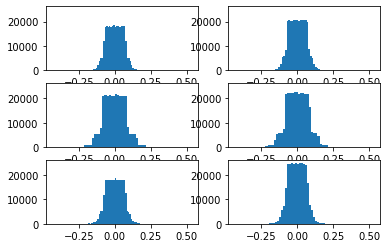

In [60]:
ax1 = plt.subplot(3, 2, 1)
plt.hist(np.concatenate(weights1).flatten(), bins=60)
plt.subplot(3, 2, 2, sharex=ax1, sharey=ax1)
plt.hist(np.concatenate(weights2).flatten(), bins=60)
plt.subplot(3, 2, 3, sharex=ax1, sharey=ax1)
plt.hist(np.concatenate(weights3).flatten(), bins=60)
plt.subplot(3, 2, 4, sharex=ax1, sharey=ax1)
plt.hist(np.concatenate(weights4).flatten(), bins=60)
plt.subplot(3, 2, 5, sharex=ax1, sharey=ax1)
plt.hist(np.concatenate(weights5).flatten(), bins=60)
plt.subplot(3, 2, 6, sharex=ax1, sharey=ax1)
plt.hist(np.concatenate(weights6).flatten(), bins=60)

plt.show()

### 1.l Otros Optimizadores

Finalmente, utilizando la estructura de red que mejor se haya desempeñado a lo largo de la tarea, entrene esta red utilizando un optimizador distinto al gradiente descendente vainilla. Pruebe al menos 2 optimizadores implementados en keras (puede utilizar Adam, AdaGrad, AdaDelta, RMSprop, entre otros) o modificar los parámetros que no hemos utilizado del gradiente descendente (momentum, momentum de Nesterov...).

Note que por las inicializaciones por defecto de los pesos de las capas y la naturaleza de los datos en cuestión, puede ocurrir que para los valores defecto de algunos optimizadores la red diverga en las primeras iteraciones. Para fijar los parámeros de los optimizadores debe importarlos desde `keras.optimizers` y pasar el objeto con los parámetros deseados al método `.compile` de su modelo. En cambio si con los valores usuales basta, algunos optimizadores pueden pasarse como `string` a `.compile`.

Compare como se desempeñan estos optimizadores con la versión utilizada anteriormente, considerando los tiempos de entrenamiento, la velocidad de convergencia y el desempeño final alcanzado. Apoyese de gráficos. 

In [64]:
inputs = Input(shape=(x_train.shape[1],))
hidden1 = Dense(128)(inputs)
activ1 = LeakyReLU(0.5)(hidden1)
drop1 = Dropout(0.5)(activ1)
outputs = Dense(1)(drop1)
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mse')

history = model.fit(x_train, y_train, epochs=60, validation_data=(x_val, y_val), callbacks=[terminate])

inputs = Input(shape=(x_train.shape[1],))
hidden1 = Dense(128)(inputs)
activ1 = LeakyReLU(0.5)(hidden1)
drop1 = Dropout(0.5)(activ1)
outputs = Dense(1)(drop1)
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='RMSprop', loss='mse')

history = model.fit(x_train, y_train, epochs=60, validation_data=(x_val, y_val), callbacks=[terminate])

Train on 51877 samples, validate on 7559 samples
Epoch 1/60
51877/51877 [==============================] - 7s 137us/sample - loss: 21.4516 - val_loss: 8.1287
Epoch 2/60
51877/51877 [==============================] - 4s 78us/sample - loss: 7.0028 - val_loss: 2.8258
Epoch 3/60
51877/51877 [==============================] - 4s 77us/sample - loss: 2.3471 - val_loss: 0.8556
Epoch 4/60
51877/51877 [==============================] - 4s 84us/sample - loss: 0.8971 - val_loss: 0.6881
Epoch 5/60
51877/51877 [==============================] - 4s 77us/sample - loss: 0.7536 - val_loss: 0.5599
Epoch 6/60
51877/51877 [==============================] - 4s 86us/sample - loss: 0.6442 - val_loss: 0.3772
Epoch 7/60
51877/51877 [==============================] - 4s 80us/sample - loss: 0.6691 - val_loss: 0.7096
Epoch 8/60
51877/51877 [==============================] - 4s 79us/sample - loss: 0.6423 - val_loss: 0.6031
Epoch 9/60
51877/51877 [==============================] - 4s 79us/sample - loss: 0.9377 - val

51877/51877 [==============================] - 4s 73us/sample - loss: 0.9435 - val_loss: 0.4638
Epoch 17/60
51877/51877 [==============================] - 4s 74us/sample - loss: 1.2180 - val_loss: 1.7762
Epoch 18/60
51877/51877 [==============================] - 4s 75us/sample - loss: 1.3971 - val_loss: 0.6393
Epoch 19/60
51877/51877 [==============================] - 4s 75us/sample - loss: 1.6490 - val_loss: 2.1938
Epoch 20/60
51877/51877 [==============================] - 4s 75us/sample - loss: 2.0206 - val_loss: 1.4423
Epoch 21/60
51877/51877 [==============================] - 4s 74us/sample - loss: 2.4549 - val_loss: 0.8583
Epoch 22/60
51877/51877 [==============================] - 4s 74us/sample - loss: 2.6569 - val_loss: 5.8038
Epoch 23/60
51877/51877 [==============================] - 4s 75us/sample - loss: 3.0707 - val_loss: 2.7336
Epoch 24/60
51877/51877 [==============================] - 4s 75us/sample - loss: 3.8567 - val_loss: 0.4068
Epoch 25/60
51877/51877 [===============

### 1.m Testing 

Finalmente, luego de entrenar todos estos modelos estamos en condiciones de probar que tan bien fue nuestro desempeño. Para esto utilice el modelo en el cual obtuvo el mejor desempeño en validación y calcule el error cuadrático medio de la predicción realizada sobre el _Test set_. Para puede utilizar el metodo `.predict` de su modelo. 

¿Qué tan bien se desempeñaría su modelo en un caso real en vista de lo anterior? Si su curiosidad es suficiente, puede calcular el error real de su modelo transformando nuevamente el _target_ y su predicción a la escala original (utilizando su `scaler`) y tranformando a precio aplicando exponenciación (pues Y estaba espresado en escala logaritmica).

In [69]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

inputs = Input(shape=(x_train.shape[1],))
hidden1 = Dense(256, activation='relu')(inputs)
drop1 = Dropout(0.2)(hidden1)
hidden2 = Dense(128, activation='relu')(drop1)
drop2 = Dropout(0.2)(hidden2)
hidden3 = Dense(64, activation='relu')(drop2)
drop3 = Dropout(0.2)(hidden3)
outputs = Dense(1)(drop3)
model = Model(inputs=inputs, outputs=outputs)
adam = Adam(lr=0.0005)
model.compile(optimizer=adam, loss='mse')

stopper = EarlyStopping(min_delta=0.001, patience=5, restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=60, validation_data=(x_val, y_val), callbacks=[stopper, terminate])

y_pred1 = model.predict(X_test)

inputs = Input(shape=(x_train.shape[1],))
hidden1 = Dense(128)(inputs)
activ1 = LeakyReLU(0.5)(hidden1)
drop1 = Dropout(0.5)(activ1)
outputs = Dense(1)(drop1)
model2 = Model(inputs=inputs, outputs=outputs)
model2.compile(optimizer=SGD(lr=0.001), loss='mse')

stopper2 = EarlyStopping(min_delta=0.0005, patience=7, restore_best_weights=True)

history = model2.fit(x_train, y_train, epochs=120, validation_data=(x_val, y_val), callbacks=[schedule, terminate, stopper])

y_pred2 = model2.predict(X_test)

print('test MSE modelo deep:', mean_squared_error(y_pred1, y_test))
print('test MSE lr decay:', mean_squared_error(y_pred2, y_test))

Train on 51877 samples, validate on 7559 samples
Epoch 1/60
51877/51877 [==============================] - 10s 196us/sample - loss: 1.1678 - val_loss: 0.5570
Epoch 2/60
51877/51877 [==============================] - 5s 106us/sample - loss: 0.5918 - val_loss: 0.2639
Epoch 3/60
51877/51877 [==============================] - 5s 105us/sample - loss: 0.4787 - val_loss: 0.2290
Epoch 4/60
51877/51877 [==============================] - 6s 106us/sample - loss: 0.3980 - val_loss: 0.2671
Epoch 5/60
51877/51877 [==============================] - 6s 106us/sample - loss: 0.3341 - val_loss: 0.1917
Epoch 6/60
51877/51877 [==============================] - 5s 102us/sample - loss: 0.2956 - val_loss: 0.1915
Epoch 7/60
51877/51877 [==============================] - 6s 117us/sample - loss: 0.2688 - val_loss: 0.1897
Epoch 8/60
51877/51877 [==============================] - 6s 107us/sample - loss: 0.2523 - val_loss: 0.1813
Epoch 9/60
51877/51877 [==============================] - 5s 105us/sample - loss: 0.23